In [90]:
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
#Reading data
dataset = pd.read_csv('titanic_data.csv')
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,fair,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
#Removing unnecessary columns
dataset.drop(['PassengerId','Name','Ticket','fair','Embarked','Cabin'],axis = 'columns',inplace = True)
dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [93]:
#Fill na values with mean
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset.head(5)
print("Dataset informartion:\n")
dataset.info()
print("\n\nDataset null info:\n")
dataset.isnull()

Dataset informartion:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


Dataset null info:



,Survived,Pclass,Sex,Age,SibSp,Parch
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [94]:
# Storing independent and dependent variable
y = dataset.Survived
dataset.drop(['Survived'],axis = 'columns',inplace = True)
X = dataset

In [95]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

X['Sex'] = lb.fit_transform(X[ 'Sex'])
X.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.0,1,0
1,1,0,38.0,1,0
2,3,0,26.0,0,0
3,1,0,35.0,1,0
4,3,1,35.0,0,0


In [96]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.head(5)

,Pclass,Sex,Age,SibSp,Parch
105,3,1,28.0,0,0
68,3,0,17.0,4,2
253,3,1,30.0,1,0
320,3,1,22.0,0,0
706,2,0,45.0,0,0


In [97]:
# Fitting model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [98]:
#Prediction
y_pred = classifier.predict(X_test)
y_pred
print('Accuracy:',classifier.score(X_test,y_test)*100)

Accuracy: 78.9237668161435


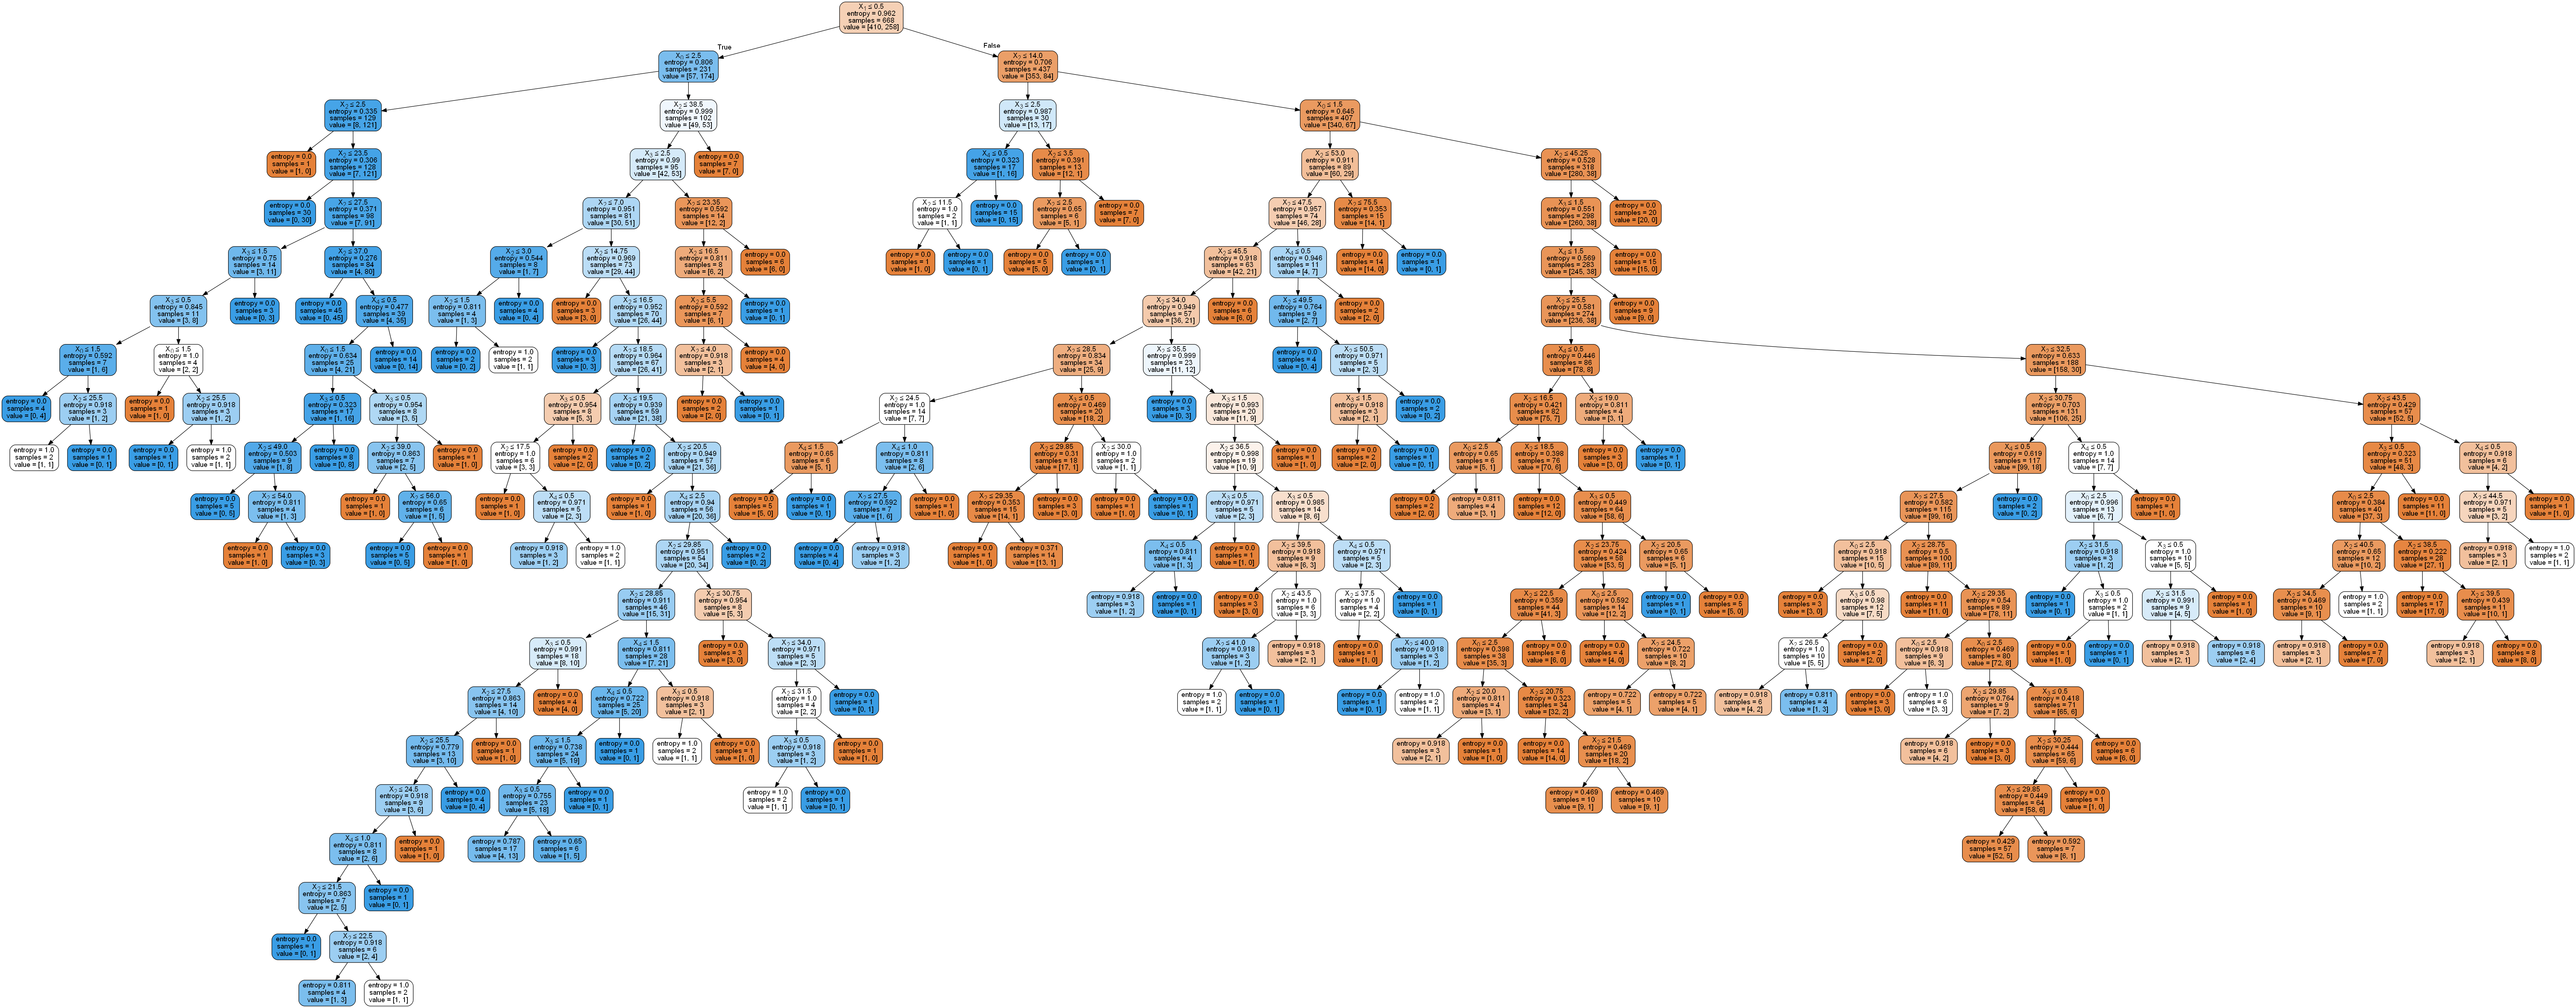

In [99]:
#drawing Decision Tree, you need graphviz application installed(with environment variable set) to print decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [100]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('Classification Report :\n',classification_report(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))

Classification Report :
              precision    recall  f1-score   support

          0       0.81      0.86      0.84       139
          1       0.75      0.67      0.70        84

avg / total       0.79      0.79      0.79       223

Confusion Matrix:
 [[120  19]
 [ 28  56]]


In [101]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error, mean_squared_log_error, r2_score
import sklearn.metrics as mt
print('Mean Absoulute Score:',mean_absolute_error(y_test, y_pred)*100)
print('Mean Squared Error:',mean_squared_error(y_test,y_pred)*100)
print('Mean Squared Log Error:',mean_squared_log_error(y_test,y_pred)*100)
print('R2 Score:',r2_score(y_test,y_pred)*100)
print("Accuracy:",mt.accuracy_score(y_test, y_pred))

Mean Absoulute Score: 21.076233183856502
Mean Squared Error: 21.076233183856502
Mean Squared Log Error: 10.126139755226665
R2 Score: 10.234669407331253
Accuracy: 0.7892376681614349
